In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess

### Settings

In [7]:
#om mee te spelen (misschien? niet mijn probleem)
apprs = "9" #approximation set size

#(almost) set in stone
algo = "./mamalgam" #which executable to use
pro = "35" #problem index
rnd = "1234" #random seed
wrp = "./"

# to keep in line with the others
#ssize = "15" #solution set size
low = "-5" #lower init bound
upp = "5" #upper init bound
pop = "100" #population size
ela = "1000" #elitist archive size target
eva = "10000" #maximum number of MO evaluations
sec = "60" #time limit

#not used
vtr = "123" #value to reach (unsure if we should use or not)
dim = "3" #number of parameters

### Run algorithm (duurt ffkes)

In [12]:
print(command)

['./mamalgam' '-s' '-e' '-v' '35' '3' '-5' '5' '100' '1000' '9' '10000'
 '60' '123' '1234' './']


In [13]:
command = np.array([algo, "-s", "-v", pro, dim, low, upp, pop, ela, apprs, eva, sec, vtr, rnd, wrp])

subprocess.run(command)


CompletedProcess(args=array(['./mamalgam', '-s', '-v', '35', '3', '-5', '5', '100', '1000', '9',
       '10000', '60', '123', '1234', './'], dtype='<U10'), returncode=-6)

### Process data and show plots

In [27]:
# path to statistics file
path1 = "".join("./statistics_UVHGOMEA_lmod" + lmod + "_problem" 
+ pro + "_p" + ssize + "_run" + rnd + ".dat")

#path to pareto front file
path2 = "".join("./best_final_UVHGOMEA_lmod" + lmod + "_problem" + pro
+ "_p" + ssize + "_run" + rnd + ".dat")

df = pd.read_csv(path1, delim_whitespace=True)
data = np.genfromtxt(path2, delimiter='')

#print(data)
df.head()


,Gen,Evals,Time,Best-f,Best-constr,Average-obj,Std-obj,Avg-constr,Std-constr,Best-HV,Best-IGD,Best-GD,size,Archive-HV,Archive-IGD,Archive-GD,size.1,MO-evals
0,0,100,0.003162,-2338.918834,0.0,-1529.0,0.23630,0.0,0.0,2441.977127,0.0,0.0,5,2483.636149,0.0,0.0,37,1500
1,1,199,0.025670,-2503.904087,0.0,-2093.0,0.07804,0.0,0.0,2563.189829,0.0,0.0,5,2673.728803,0.0,0.0,57,2985
2,2,315,0.043780,-2570.951254,0.0,-2175.0,0.06973,0.0,0.0,2575.811167,0.0,0.0,7,2680.972675,0.0,0.0,87,4725
3,3,431,0.061690,-2594.012614,0.0,-2206.0,0.06790,0.0,0.0,2596.475793,0.0,0.0,8,2685.538663,0.0,0.0,120,6465
4,4,547,0.080130,-2638.099487,0.0,-2278.0,0.06201,0.0,0.0,2641.145679,0.0,0.0,9,2687.345230,0.0,0.0,154,8205


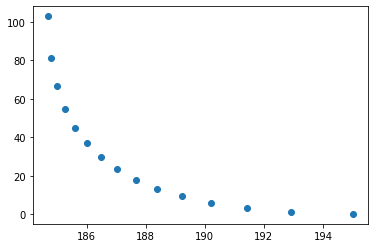

In [28]:
data_conc = np.zeros((len(data[:,0]),2))
data_conc[:,0] = data[:,0]
data_conc[:,1] = data[:,1]

#print(data_conc)

plt.plot(data_conc[:,0],data_conc[:,1],'o')

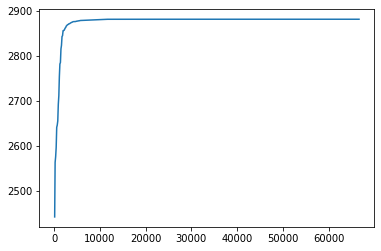

In [29]:
#plt.plot(df.Evals, -1*df['Best-f'])
plt.plot(df.Evals, df['Best-HV'])